In [2]:
import os
os.chdir("C:/Users/27261/Desktop/prostate/code-0126")
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('PREPROCESSING')
from preprocessing import DataPreProcessor


In [3]:
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters

In [6]:
TRAIN_FILE = 'Dataset_cedric/Train.csv'
SYNTHETIC_FILE = 'Dataset_cedric/SYNTHETIC DATASETS/WGANGP-2.csv'

## Data Preprocessing

In [7]:
import pandas as pd
real_data = pd.read_csv(TRAIN_FILE)
categorical_columns = ["cT(MRI)","Multifocaal", "pN", "1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)"]
for col in categorical_columns :
    real_data[col] = real_data[col].astype('category')
data_cols = real_data.columns
data_train = real_data
real_data

,eadnr (I),Age,Multifocaal,1c (0) - Perifeer (1) - Beide (2) - Transitie (3),Preoperatief PSA,Aantal zones positive percentage,Primaire Gleason,Secundaire Gleason,Grade group (highest),Target biopsie Core length (perc),...,Grootste diameter (percentage of tumor),Grootste mm aantasting (mms),Primaire,Secundaire,Grade group Grootste mm aantasting,Primaire Gleason.1,Secundaire Gleason.1,Grade Group,pN,cT(MRI)
0,74911959,60.254795,0,3,1.90,0.300000,3,4,2,20.0,...,20.0,4.0,3,4,2,3,3,1,0,1
1,72364086,66.391781,1,3,4.02,0.300000,4,3,3,8.0,...,87.0,7.0,3,3,1,3,3,1,0,1
2,72845225,69.010959,0,1,4.60,0.250000,4,4,4,17.0,...,17.0,2.0,4,4,4,4,3,3,0,4
3,65384463,41.136986,0,3,5.00,0.666667,3,4,2,46.0,...,46.0,6.0,3,4,2,3,4,2,0,1
4,83257287,74.665753,0,1,10.90,1.000000,4,5,5,100.0,...,100.0,17.0,4,5,5,4,5,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,77679900,68.350685,0,1,4.91,0.500000,4,5,5,30.0,...,30.0,4.0,4,4,4,4,3,3,1,4
229,70544747,73.531507,0,1,9.70,1.000000,4,3,3,31.0,...,31.0,4.0,3,4,2,3,4,2,0,4
230,88824362,65.734247,0,1,10.30,1.000000,4,3,3,83.0,...,83.0,10.0,4,3,3,4,3,3,0,4
231,61072681,60.189041,0,1,10.80,0.200000,3,3,1,30.0,...,30.0,4.5,3,3,1,3,3,1,0,4


In [5]:
# data configuration
# preprocessor = DataPreProcessor(data_train)
# data_train = preprocessor.preprocess_train_data()
# data_train

,eadnr (I),Age,Preoperatief PSA,Aantal zones positive percentage,Primaire Gleason,Secundaire Gleason,Grade group (highest),Target biopsie Core length (perc),Target biopsie Core length (mm),TargetBiopsie Primaire Gleason,...,1c (0) - Perifeer (1) - Beide (2) - Transitie (3)3,pN0,pN1,cT(MRI)0,cT(MRI)1,cT(MRI)2,cT(MRI)3,cT(MRI)4,cT(MRI)5,cT(MRI)6
0,-0.119254,-0.684315,-0.599760,-0.931759,-1.063491,0.207716,-0.940279,-1.703472,-1.085829,-1.094205,...,1.913113,0.420437,-0.420437,-0.132164,1.660742,-0.065653,-0.346688,-0.962091,-0.322902,-0.175993
1,-0.388239,0.259867,-0.462666,-0.931759,0.732113,-1.258883,-0.046054,-2.152475,-1.887301,0.753257,...,1.913113,0.420437,-0.420437,-0.132164,1.660742,-0.065653,-0.346688,-0.962091,-0.322902,-0.175993
2,-0.337444,0.662830,-0.425159,-1.096944,0.732113,0.207716,0.848170,-1.815722,-1.620144,0.753257,...,-0.522708,0.420437,-0.420437,-0.132164,-0.602140,-0.065653,-0.346688,1.039402,-0.322902,-0.175993
3,-1.125094,-3.625609,-0.399292,0.279596,-1.063491,0.207716,-0.940279,-0.730631,-0.551514,-1.094205,...,1.913113,0.420437,-0.420437,-0.132164,1.660742,-0.065653,-0.346688,-0.962091,-0.322902,-0.175993
4,0.761782,1.532826,-0.017757,1.380828,0.732113,1.674314,1.742395,1.289884,2.387218,0.753257,...,-0.522708,0.420437,-0.420437,-0.132164,-0.602140,-0.065653,-0.346688,1.039402,-0.322902,-0.175993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.172964,0.561247,-0.405112,-0.271020,0.732113,1.674314,1.742395,-1.329302,-1.352986,0.753257,...,-0.522708,-2.378475,2.378475,-0.132164,-0.602140,-0.065653,-0.346688,1.039402,-0.322902,-0.175993
229,-0.580310,1.358321,-0.095357,1.380828,0.732113,-1.258883,-0.046054,-1.291885,-1.085829,0.753257,...,-0.522708,0.420437,-0.420437,-0.132164,-0.602140,-0.065653,-0.346688,1.039402,-0.322902,-0.175993
230,1.349511,0.158705,-0.056557,1.380828,0.732113,-1.258883,-0.046054,0.653796,0.517116,0.753257,...,-0.522708,0.420437,-0.420437,-0.132164,-0.602140,-0.065653,-0.346688,1.039402,-0.322902,-0.175993
231,-1.580299,-0.694431,-0.024224,-1.262129,-1.063491,-1.258883,-1.834504,-1.329302,-0.952250,-1.094205,...,-0.522708,0.420437,-0.420437,-0.132164,-0.602140,-0.065653,-0.346688,1.039402,-0.322902,-0.175993


## Train the Model

Next, lets define the neural network for generating synthetic data. We will be using a [GAN](https://www.wikiwand.com/en/Generative_adversarial_network) network that comprises of an generator and discriminator that tries to beat each other and in the process learns the vector embedding for the data. 

The model was taken from a [Github repository](https://github.com/ydataai/gan-playground) where it is used to generate synthetic data on credit card fraud data. 

In [8]:
#Defining the training parameters
noise_dim = 128
dim = 128
batch_size = 500

log_step = 100
epochs = 500+1
learning_rate = [5e-4, 3e-3]
beta_1 = 0.5
beta_2 = 0.9
models_dir = '../cache'

In [9]:
gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             sample_interval=log_step)

In [10]:
cat_cols = ["cT(MRI)","Multifocaal", "pN", "1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)"]
all_cols = set(data_train.columns)
cat_cols_set = set(cat_cols)
num_cols = list(all_cols - cat_cols_set)

In [11]:
synth = RegularSynthesizer(modelname='wgangp', model_parameters=gan_args, n_critic=2)
synth.fit(data_train, train_args, num_cols, cat_cols)

synth.save('adult_wgangp_model.pkl')

  1%|          | 5/501 [00:01<01:58,  4.18it/s]

Epoch: 0 | disc_loss: 154.89808654785156 | gen_loss: 0.02116665244102478
Epoch: 1 | disc_loss: 23.838031768798828 | gen_loss: 0.007076869253069162
Epoch: 2 | disc_loss: 10.020590782165527 | gen_loss: -0.008013635873794556
Epoch: 3 | disc_loss: 4.858347415924072 | gen_loss: -0.005351728294044733
Epoch: 4 | disc_loss: 2.4659366607666016 | gen_loss: 0.005319213028997183
Epoch: 5 | disc_loss: 1.0621651411056519 | gen_loss: 0.010344383306801319


  3%|▎         | 13/501 [00:01<00:40, 11.95it/s]

Epoch: 6 | disc_loss: 0.30619165301322937 | gen_loss: 0.026966243982315063
Epoch: 7 | disc_loss: 0.24237556755542755 | gen_loss: 0.028512397781014442
Epoch: 8 | disc_loss: 0.3821934163570404 | gen_loss: 0.018468476831912994
Epoch: 9 | disc_loss: 0.17560745775699615 | gen_loss: 0.036179207265377045
Epoch: 10 | disc_loss: 0.2454785853624344 | gen_loss: 0.04628371819853783
Epoch: 11 | disc_loss: 0.13471905887126923 | gen_loss: 0.05594369396567345
Epoch: 12 | disc_loss: 0.09576588124036789 | gen_loss: 0.052121132612228394


  3%|▎         | 17/501 [00:01<00:31, 15.55it/s]

Epoch: 13 | disc_loss: -0.003137810155749321 | gen_loss: 0.03494276851415634
Epoch: 14 | disc_loss: 0.12553325295448303 | gen_loss: -0.015308575704693794
Epoch: 15 | disc_loss: -0.013541042804718018 | gen_loss: 0.04184013977646828
Epoch: 16 | disc_loss: 0.41995134949684143 | gen_loss: 0.049044858664274216
Epoch: 17 | disc_loss: -0.008960340172052383 | gen_loss: 0.016793236136436462
Epoch: 18 | disc_loss: 8.946564674377441 | gen_loss: 0.0013078629272058606


  5%|▍         | 23/501 [00:02<00:24, 19.69it/s]

Epoch: 19 | disc_loss: 0.7943747043609619 | gen_loss: -0.003571524750441313
Epoch: 20 | disc_loss: 5.019010066986084 | gen_loss: 0.033194903284311295
Epoch: 21 | disc_loss: 0.31052181124687195 | gen_loss: 0.016161352396011353
Epoch: 22 | disc_loss: 0.03179271146655083 | gen_loss: 0.031152112409472466
Epoch: 23 | disc_loss: 0.29225587844848633 | gen_loss: 0.017536072060465813
Epoch: 24 | disc_loss: 1.4736708402633667 | gen_loss: -0.032108571380376816
Epoch: 25 | disc_loss: 3.784080982208252 | gen_loss: 0.01730969548225403


  6%|▌         | 31/501 [00:02<00:18, 24.86it/s]

Epoch: 26 | disc_loss: 3.045079231262207 | gen_loss: -0.07074563950300217
Epoch: 27 | disc_loss: 0.5381671786308289 | gen_loss: 0.16964402794837952
Epoch: 28 | disc_loss: -0.007869460619986057 | gen_loss: -0.007828155532479286
Epoch: 29 | disc_loss: 0.308030903339386 | gen_loss: 0.09834835678339005
Epoch: 30 | disc_loss: 1.0862202644348145 | gen_loss: -0.008239141665399075
Epoch: 31 | disc_loss: 0.444205105304718 | gen_loss: 0.033817045390605927
Epoch: 32 | disc_loss: 0.09561343491077423 | gen_loss: 0.06695806235074997


  7%|▋         | 37/501 [00:02<00:17, 26.42it/s]

Epoch: 33 | disc_loss: -0.04966770112514496 | gen_loss: 0.09434926509857178
Epoch: 34 | disc_loss: 0.7763639092445374 | gen_loss: -0.14480148255825043
Epoch: 35 | disc_loss: 0.3317866027355194 | gen_loss: 0.031093226745724678
Epoch: 36 | disc_loss: 0.4824284613132477 | gen_loss: -0.01382588129490614
Epoch: 37 | disc_loss: 0.14645437896251678 | gen_loss: 0.06275191903114319
Epoch: 38 | disc_loss: 1.0700526237487793 | gen_loss: -0.020094608888030052
Epoch: 39 | disc_loss: 0.3919322192668915 | gen_loss: -0.044205088168382645


  9%|▉         | 45/501 [00:02<00:15, 29.12it/s]

Epoch: 40 | disc_loss: 0.045189019292593 | gen_loss: -0.03208022937178612
Epoch: 41 | disc_loss: 0.6785779595375061 | gen_loss: 0.038708530366420746
Epoch: 42 | disc_loss: 0.45610710978507996 | gen_loss: -0.048010699450969696
Epoch: 43 | disc_loss: 0.26233208179473877 | gen_loss: -0.004405910149216652
Epoch: 44 | disc_loss: 0.0894300565123558 | gen_loss: 0.009000439196825027
Epoch: 45 | disc_loss: 1.0791089534759521 | gen_loss: -0.01348702609539032
Epoch: 46 | disc_loss: 0.6775422096252441 | gen_loss: 0.022446446120738983


 11%|█         | 53/501 [00:03<00:15, 29.24it/s]

Epoch: 47 | disc_loss: 0.43186843395233154 | gen_loss: -0.021436301991343498
Epoch: 48 | disc_loss: 1.2397832870483398 | gen_loss: -0.026572026312351227
Epoch: 49 | disc_loss: 0.15437756478786469 | gen_loss: -0.011783353053033352
Epoch: 50 | disc_loss: 0.607610821723938 | gen_loss: -0.017551539465785027
Epoch: 51 | disc_loss: 0.157049298286438 | gen_loss: -0.09208179265260696
Epoch: 52 | disc_loss: 0.8902043700218201 | gen_loss: -0.022321004420518875


 12%|█▏        | 59/501 [00:03<00:15, 28.91it/s]

Epoch: 53 | disc_loss: -0.0024218233302235603 | gen_loss: -0.049034249037504196
Epoch: 54 | disc_loss: 0.15454590320587158 | gen_loss: 0.039884086698293686
Epoch: 55 | disc_loss: -0.009625662118196487 | gen_loss: -0.08170448988676071
Epoch: 56 | disc_loss: 1.616068720817566 | gen_loss: -0.037680063396692276
Epoch: 57 | disc_loss: 0.07088933885097504 | gen_loss: -0.03279571607708931
Epoch: 58 | disc_loss: 0.2095387578010559 | gen_loss: -0.039971087127923965
Epoch: 59 | disc_loss: 0.7861130237579346 | gen_loss: -0.09486677497625351


 13%|█▎        | 65/501 [00:03<00:14, 29.14it/s]

Epoch: 60 | disc_loss: 13.134580612182617 | gen_loss: -0.029134482145309448
Epoch: 61 | disc_loss: 1.1885403394699097 | gen_loss: -0.00469899782910943
Epoch: 62 | disc_loss: 1.4647477865219116 | gen_loss: 0.004494361113756895
Epoch: 63 | disc_loss: 0.7992511987686157 | gen_loss: -0.00027649730327539146
Epoch: 64 | disc_loss: -0.0517643466591835 | gen_loss: 0.0017624051542952657
Epoch: 65 | disc_loss: 0.49963492155075073 | gen_loss: 0.0174085833132267
Epoch: 66 | disc_loss: 0.023646622896194458 | gen_loss: -0.0006640612846240401


 14%|█▍        | 71/501 [00:03<00:15, 27.67it/s]

Epoch: 67 | disc_loss: 1.3895083665847778 | gen_loss: 0.0016863164491951466
Epoch: 68 | disc_loss: 0.23219561576843262 | gen_loss: -0.04961850121617317
Epoch: 69 | disc_loss: 1.9911812543869019 | gen_loss: 0.08336316049098969
Epoch: 70 | disc_loss: 1.005631685256958 | gen_loss: -0.054620161652565
Epoch: 71 | disc_loss: 2.445488452911377 | gen_loss: 0.0394698865711689
Epoch: 72 | disc_loss: 0.04085042327642441 | gen_loss: 0.018963126465678215


 16%|█▌        | 79/501 [00:04<00:14, 29.41it/s]

Epoch: 73 | disc_loss: 1.006739854812622 | gen_loss: -0.013194642961025238
Epoch: 74 | disc_loss: 1.4356023073196411 | gen_loss: -0.016302265226840973
Epoch: 75 | disc_loss: 0.023371227085590363 | gen_loss: -0.006010071374475956
Epoch: 76 | disc_loss: 0.42275387048721313 | gen_loss: -0.012045743875205517
Epoch: 77 | disc_loss: 0.11938375979661942 | gen_loss: -0.02051703818142414
Epoch: 78 | disc_loss: 0.0328826904296875 | gen_loss: -0.020576169714331627
Epoch: 79 | disc_loss: -0.025058049708604813 | gen_loss: -0.00916095171123743


 17%|█▋        | 86/501 [00:04<00:13, 29.97it/s]

Epoch: 80 | disc_loss: 0.7096647024154663 | gen_loss: -0.0073150573298335075
Epoch: 81 | disc_loss: 0.5519943237304688 | gen_loss: 0.03966505080461502
Epoch: 82 | disc_loss: 1.3287938833236694 | gen_loss: -0.06694704294204712
Epoch: 83 | disc_loss: -0.005791733507066965 | gen_loss: -0.06929050385951996
Epoch: 84 | disc_loss: 0.5292096734046936 | gen_loss: -0.04242514818906784
Epoch: 85 | disc_loss: 0.1324152946472168 | gen_loss: -0.03089558146893978
Epoch: 86 | disc_loss: 0.021006036549806595 | gen_loss: -0.028870554640889168


 19%|█▉        | 94/501 [00:04<00:13, 30.44it/s]

Epoch: 87 | disc_loss: 0.5171317458152771 | gen_loss: -0.038003675639629364
Epoch: 88 | disc_loss: 1.9995535612106323 | gen_loss: -0.037463054060935974
Epoch: 89 | disc_loss: 4.618632793426514 | gen_loss: -0.04463428258895874
Epoch: 90 | disc_loss: 0.8489587306976318 | gen_loss: -0.05401964485645294
Epoch: 91 | disc_loss: -0.012851685285568237 | gen_loss: -0.052663423120975494
Epoch: 92 | disc_loss: 0.6379655599594116 | gen_loss: -0.054356370121240616
Epoch: 93 | disc_loss: 1.0830885171890259 | gen_loss: -0.08075355738401413


 20%|█▉        | 98/501 [00:04<00:13, 30.36it/s]

Epoch: 94 | disc_loss: 2.5984654426574707 | gen_loss: -0.07393880188465118
Epoch: 95 | disc_loss: 0.7693341374397278 | gen_loss: -0.08040028065443039
Epoch: 96 | disc_loss: 0.06132719665765762 | gen_loss: -0.12149659544229507
Epoch: 97 | disc_loss: 0.30986106395721436 | gen_loss: -0.1016477569937706
Epoch: 98 | disc_loss: -0.005551207344979048 | gen_loss: -0.02613096497952938
Epoch: 99 | disc_loss: 7.337284088134766 | gen_loss: -0.16477763652801514


 21%|██        | 105/501 [00:04<00:13, 28.84it/s]

Epoch: 100 | disc_loss: 0.36662203073501587 | gen_loss: -0.17717508971691132
Epoch: 101 | disc_loss: 1.3004286289215088 | gen_loss: -0.18103255331516266
Epoch: 102 | disc_loss: 0.061067141592502594 | gen_loss: -0.0371219702064991
Epoch: 103 | disc_loss: 0.4833090305328369 | gen_loss: -0.06895612925291061
Epoch: 104 | disc_loss: 2.8137176036834717 | gen_loss: -0.07682187110185623
Epoch: 105 | disc_loss: 0.06358978897333145 | gen_loss: -0.08056510239839554


 22%|██▏       | 111/501 [00:05<00:13, 29.01it/s]

Epoch: 106 | disc_loss: 0.32967597246170044 | gen_loss: -0.004907289519906044
Epoch: 107 | disc_loss: -0.03838896006345749 | gen_loss: 0.001913675805553794
Epoch: 108 | disc_loss: 1.2330282926559448 | gen_loss: -0.011916720308363438
Epoch: 109 | disc_loss: 0.7013712525367737 | gen_loss: -0.15843670070171356
Epoch: 110 | disc_loss: 1.8663617372512817 | gen_loss: -0.015107172541320324
Epoch: 111 | disc_loss: 0.221573606133461 | gen_loss: -0.015597550198435783
Epoch: 112 | disc_loss: 0.08425401151180267 | gen_loss: 0.006756563205271959


 23%|██▎       | 117/501 [00:05<00:13, 28.89it/s]

Epoch: 113 | disc_loss: 0.3168482780456543 | gen_loss: 0.018801838159561157
Epoch: 114 | disc_loss: 0.7147646546363831 | gen_loss: -0.011007552035152912
Epoch: 115 | disc_loss: 0.09342141449451447 | gen_loss: -0.012890148907899857
Epoch: 116 | disc_loss: 0.3642008602619171 | gen_loss: -0.06561058759689331
Epoch: 117 | disc_loss: 1.4975693225860596 | gen_loss: 0.008500481955707073
Epoch: 118 | disc_loss: 0.039725884795188904 | gen_loss: 0.054079748690128326


 25%|██▍       | 123/501 [00:05<00:13, 28.22it/s]

Epoch: 119 | disc_loss: 0.4032544493675232 | gen_loss: 0.039025526493787766
Epoch: 120 | disc_loss: 1.0341053009033203 | gen_loss: -0.06366466730833054
Epoch: 121 | disc_loss: 0.9683683514595032 | gen_loss: -0.011823090724647045
Epoch: 122 | disc_loss: 0.05768144503235817 | gen_loss: -0.002164109842851758
Epoch: 123 | disc_loss: 0.5706808567047119 | gen_loss: -0.0028139064088463783
Epoch: 124 | disc_loss: 0.034401748329401016 | gen_loss: 0.0018263630336150527


 26%|██▌       | 129/501 [00:05<00:13, 28.06it/s]

Epoch: 125 | disc_loss: 0.6670319437980652 | gen_loss: 0.017615145072340965
Epoch: 126 | disc_loss: 0.5718855261802673 | gen_loss: 0.025509944185614586
Epoch: 127 | disc_loss: 0.3814857006072998 | gen_loss: 0.0015239804051816463
Epoch: 128 | disc_loss: 0.7442644834518433 | gen_loss: 0.026694752275943756
Epoch: 129 | disc_loss: 1.1568288803100586 | gen_loss: -0.011599181219935417
Epoch: 130 | disc_loss: 0.6335453391075134 | gen_loss: 0.0018377151573076844
Epoch: 131 | disc_loss: 0.6310920119285583 | gen_loss: -0.0026083607226610184


 27%|██▋       | 136/501 [00:06<00:12, 29.16it/s]

Epoch: 132 | disc_loss: 1.6147478818893433 | gen_loss: -0.015265258029103279
Epoch: 133 | disc_loss: 2.6073508262634277 | gen_loss: -0.024407075718045235
Epoch: 134 | disc_loss: 0.2169458568096161 | gen_loss: -0.040676556527614594
Epoch: 135 | disc_loss: 0.3290990889072418 | gen_loss: -0.019770249724388123
Epoch: 136 | disc_loss: 0.33338382840156555 | gen_loss: -0.012803558260202408
Epoch: 137 | disc_loss: 0.1316397339105606 | gen_loss: -0.009517161175608635


 28%|██▊       | 142/501 [00:06<00:12, 28.77it/s]

Epoch: 138 | disc_loss: -0.017169928178191185 | gen_loss: -0.012654032558202744
Epoch: 139 | disc_loss: -0.013065969571471214 | gen_loss: -0.01939031481742859
Epoch: 140 | disc_loss: 0.8829030990600586 | gen_loss: 0.00399215891957283
Epoch: 141 | disc_loss: 0.7249642014503479 | gen_loss: 0.014418983832001686
Epoch: 142 | disc_loss: 1.1917003393173218 | gen_loss: -0.046132661402225494
Epoch: 143 | disc_loss: 0.5963985323905945 | gen_loss: -0.0027670192066580057


 30%|██▉       | 148/501 [00:06<00:12, 28.22it/s]

Epoch: 144 | disc_loss: -0.012003453448414803 | gen_loss: -0.0010276841931045055
Epoch: 145 | disc_loss: 2.3346028327941895 | gen_loss: -0.038558103144168854
Epoch: 146 | disc_loss: 4.18794059753418 | gen_loss: -0.04235101491212845
Epoch: 147 | disc_loss: 3.369297981262207 | gen_loss: -0.01911063678562641
Epoch: 148 | disc_loss: 3.3949267864227295 | gen_loss: -0.029821045696735382
Epoch: 149 | disc_loss: -0.00015643006190657616 | gen_loss: -0.053401973098516464
Epoch: 150 | disc_loss: 1.4866752624511719 | gen_loss: -0.052598413079977036


 31%|███       | 155/501 [00:06<00:12, 28.24it/s]

Epoch: 151 | disc_loss: -0.008756033144891262 | gen_loss: -0.03603615611791611
Epoch: 152 | disc_loss: -0.012091433629393578 | gen_loss: -0.0168711356818676
Epoch: 153 | disc_loss: 0.36850693821907043 | gen_loss: 0.014725920744240284
Epoch: 154 | disc_loss: 0.36265912652015686 | gen_loss: -0.05088150128722191
Epoch: 155 | disc_loss: 2.2360680103302 | gen_loss: -0.0021437308751046658
Epoch: 156 | disc_loss: -0.026852348819375038 | gen_loss: -0.0024798938538879156


 32%|███▏      | 161/501 [00:06<00:12, 28.10it/s]

Epoch: 157 | disc_loss: 0.9163467288017273 | gen_loss: -0.00963645987212658
Epoch: 158 | disc_loss: 0.01666906103491783 | gen_loss: -0.015720896422863007
Epoch: 159 | disc_loss: 1.014861822128296 | gen_loss: -0.01953226327896118
Epoch: 160 | disc_loss: 0.07836224138736725 | gen_loss: -0.008637665770947933
Epoch: 161 | disc_loss: 0.3623430132865906 | gen_loss: -0.01250053197145462
Epoch: 162 | disc_loss: 3.4871559143066406 | gen_loss: -0.03139648586511612
Epoch: 163 | disc_loss: 0.5464726686477661 | gen_loss: -0.039143092930316925


 34%|███▎      | 168/501 [00:07<00:11, 28.86it/s]

Epoch: 164 | disc_loss: 0.23999890685081482 | gen_loss: -0.0448136143386364
Epoch: 165 | disc_loss: 0.04935421049594879 | gen_loss: -0.04914649948477745
Epoch: 166 | disc_loss: 0.7414160370826721 | gen_loss: -0.028359560295939445
Epoch: 167 | disc_loss: 3.1802966594696045 | gen_loss: -0.010286389850080013
Epoch: 168 | disc_loss: 0.004041172098368406 | gen_loss: 0.010301337577402592
Epoch: 169 | disc_loss: 2.291248321533203 | gen_loss: -0.0015946583589538932


 35%|███▍      | 174/501 [00:07<00:11, 27.69it/s]

Epoch: 170 | disc_loss: 1.722795844078064 | gen_loss: 0.0024923309683799744
Epoch: 171 | disc_loss: 1.0581002235412598 | gen_loss: -0.006820592563599348
Epoch: 172 | disc_loss: 1.0293844938278198 | gen_loss: -0.009526972658932209
Epoch: 173 | disc_loss: 3.8115220069885254 | gen_loss: 0.0052889259532094
Epoch: 174 | disc_loss: 0.5066965222358704 | gen_loss: 0.0033840383403003216
Epoch: 175 | disc_loss: 1.0397859811782837 | gen_loss: -0.010659253224730492
Epoch: 176 | disc_loss: 0.8842964768409729 | gen_loss: -0.01766122132539749


 36%|███▌      | 181/501 [00:07<00:11, 28.46it/s]

Epoch: 177 | disc_loss: 0.12117265164852142 | gen_loss: -0.004706060979515314
Epoch: 178 | disc_loss: 1.1226012706756592 | gen_loss: -0.034893449395895004
Epoch: 179 | disc_loss: 1.4151816368103027 | gen_loss: -0.03755301237106323
Epoch: 180 | disc_loss: 0.5836132168769836 | gen_loss: -0.07434878498315811
Epoch: 181 | disc_loss: 0.07835419476032257 | gen_loss: -0.05757143720984459
Epoch: 182 | disc_loss: 0.7871218323707581 | gen_loss: -0.03516099974513054


 37%|███▋      | 187/501 [00:07<00:11, 28.39it/s]

Epoch: 183 | disc_loss: 1.1358036994934082 | gen_loss: -0.020808639004826546
Epoch: 184 | disc_loss: 0.3515198826789856 | gen_loss: -0.027310192584991455
Epoch: 185 | disc_loss: 0.011899737641215324 | gen_loss: -0.03506297245621681
Epoch: 186 | disc_loss: 1.2903543710708618 | gen_loss: -0.07471316307783127
Epoch: 187 | disc_loss: 25.294593811035156 | gen_loss: -0.06257649511098862
Epoch: 188 | disc_loss: 0.9113307595252991 | gen_loss: -0.06718778610229492
Epoch: 189 | disc_loss: -0.003516565077006817 | gen_loss: 0.01779225841164589


 39%|███▊      | 194/501 [00:08<00:10, 29.03it/s]

Epoch: 190 | disc_loss: 0.3954547643661499 | gen_loss: -0.02515752986073494
Epoch: 191 | disc_loss: 0.567406952381134 | gen_loss: -0.006137668155133724
Epoch: 192 | disc_loss: -0.039378345012664795 | gen_loss: 0.03940889611840248
Epoch: 193 | disc_loss: 0.9661687612533569 | gen_loss: 0.021202873438596725
Epoch: 194 | disc_loss: 0.2240457832813263 | gen_loss: 0.00032372286659665406
Epoch: 195 | disc_loss: -0.0177481546998024 | gen_loss: 0.016857661306858063


 40%|███▉      | 200/501 [00:08<00:10, 29.24it/s]

Epoch: 196 | disc_loss: 0.31393691897392273 | gen_loss: 0.015415078029036522
Epoch: 197 | disc_loss: 0.2801266014575958 | gen_loss: 0.001483375672250986
Epoch: 198 | disc_loss: 0.07873430103063583 | gen_loss: -0.0014519868418574333
Epoch: 199 | disc_loss: 0.03367758169770241 | gen_loss: 0.043025027960538864
Epoch: 200 | disc_loss: 2.7152631282806396 | gen_loss: 0.0239988062530756
Epoch: 201 | disc_loss: 2.137117385864258 | gen_loss: -0.002533565741032362


 41%|████      | 206/501 [00:08<00:10, 28.62it/s]

Epoch: 202 | disc_loss: 0.3886033296585083 | gen_loss: 0.011746375821530819
Epoch: 203 | disc_loss: 0.1405140608549118 | gen_loss: 0.0016243000281974673
Epoch: 204 | disc_loss: 0.025025689974427223 | gen_loss: 0.0005470678443089128
Epoch: 205 | disc_loss: 1.043575406074524 | gen_loss: 0.02754380740225315
Epoch: 206 | disc_loss: 0.5147669315338135 | gen_loss: 0.012117350473999977
Epoch: 207 | disc_loss: 0.6546409726142883 | gen_loss: 0.00014932118938304484
Epoch: 208 | disc_loss: 0.010433187708258629 | gen_loss: -0.0037378405686467886


 43%|████▎     | 213/501 [00:08<00:10, 27.54it/s]

Epoch: 209 | disc_loss: 0.2839798331260681 | gen_loss: -0.004975273739546537
Epoch: 210 | disc_loss: 0.20941275358200073 | gen_loss: -0.022383863106369972
Epoch: 211 | disc_loss: 2.4058845043182373 | gen_loss: -0.02469252608716488
Epoch: 212 | disc_loss: 2.7798750400543213 | gen_loss: -0.016738198697566986
Epoch: 213 | disc_loss: 0.29096484184265137 | gen_loss: 0.010043558664619923
Epoch: 214 | disc_loss: 0.49062544107437134 | gen_loss: 0.007954354397952557


 44%|████▎     | 219/501 [00:08<00:09, 28.55it/s]

Epoch: 215 | disc_loss: 0.5116604566574097 | gen_loss: 0.028376368805766106
Epoch: 216 | disc_loss: -0.02488262765109539 | gen_loss: 0.04123864322900772
Epoch: 217 | disc_loss: 1.0667284727096558 | gen_loss: 0.024166207760572433
Epoch: 218 | disc_loss: 0.4563451409339905 | gen_loss: 0.03629444167017937
Epoch: 219 | disc_loss: 2.4749772548675537 | gen_loss: 0.02172306925058365
Epoch: 220 | disc_loss: 1.7294498682022095 | gen_loss: 0.04740108922123909


 46%|████▌     | 228/501 [00:09<00:09, 28.87it/s]

Epoch: 221 | disc_loss: 2.738337516784668 | gen_loss: 0.04264986515045166
Epoch: 222 | disc_loss: 0.41544872522354126 | gen_loss: 0.033124662935733795
Epoch: 223 | disc_loss: 0.6681298613548279 | gen_loss: 0.029164694249629974
Epoch: 224 | disc_loss: 0.0132649727165699 | gen_loss: 0.04246389865875244
Epoch: 225 | disc_loss: 3.5297389030456543 | gen_loss: 0.03132215514779091
Epoch: 226 | disc_loss: 4.628387928009033 | gen_loss: 0.034600600600242615
Epoch: 227 | disc_loss: 0.6748157143592834 | gen_loss: 0.024719735607504845


 47%|████▋     | 234/501 [00:09<00:09, 27.23it/s]

Epoch: 228 | disc_loss: -0.0033400277607142925 | gen_loss: 0.013581203296780586
Epoch: 229 | disc_loss: 0.28730878233909607 | gen_loss: 0.009716136381030083
Epoch: 230 | disc_loss: -0.009819041937589645 | gen_loss: 0.0025293517392128706
Epoch: 231 | disc_loss: 0.2399781346321106 | gen_loss: 0.018130198121070862
Epoch: 232 | disc_loss: 0.2914779782295227 | gen_loss: 0.0152718061581254
Epoch: 233 | disc_loss: -0.02651069685816765 | gen_loss: 0.018542282283306122


 48%|████▊     | 240/501 [00:09<00:09, 27.91it/s]

Epoch: 234 | disc_loss: 0.029938966035842896 | gen_loss: 0.013315313495695591
Epoch: 235 | disc_loss: 14.235015869140625 | gen_loss: 0.0296183992177248
Epoch: 236 | disc_loss: 0.2857607901096344 | gen_loss: 0.017209097743034363
Epoch: 237 | disc_loss: 1.3905789852142334 | gen_loss: 0.018041830509901047
Epoch: 238 | disc_loss: 0.09429274499416351 | gen_loss: 0.004341381601989269
Epoch: 239 | disc_loss: -0.0025073480792343616 | gen_loss: -0.0035495164338499308
Epoch: 240 | disc_loss: 0.059501513838768005 | gen_loss: -0.012098546139895916


 49%|████▉     | 246/501 [00:09<00:09, 27.94it/s]

Epoch: 241 | disc_loss: -0.00019182823598384857 | gen_loss: -0.02627834863960743
Epoch: 242 | disc_loss: 0.05646468698978424 | gen_loss: -0.020009124651551247
Epoch: 243 | disc_loss: 0.8245735764503479 | gen_loss: -0.007984825409948826
Epoch: 244 | disc_loss: 0.5428803563117981 | gen_loss: -0.023272348567843437
Epoch: 245 | disc_loss: 0.27396446466445923 | gen_loss: -0.03278075531125069
Epoch: 246 | disc_loss: 0.05976192653179169 | gen_loss: -0.035490572452545166


 50%|█████     | 252/501 [00:10<00:09, 25.65it/s]

Epoch: 247 | disc_loss: -0.008995123207569122 | gen_loss: -0.025156749412417412
Epoch: 248 | disc_loss: 0.05523230880498886 | gen_loss: 0.025391830131411552
Epoch: 249 | disc_loss: 1.3564457893371582 | gen_loss: -0.09245097637176514
Epoch: 250 | disc_loss: 0.9478397369384766 | gen_loss: 0.008734040893614292
Epoch: 251 | disc_loss: 1.2605429887771606 | gen_loss: 0.0006857016123831272


 51%|█████▏    | 258/501 [00:10<00:09, 26.45it/s]

Epoch: 252 | disc_loss: 1.2631407976150513 | gen_loss: -0.008160214871168137
Epoch: 253 | disc_loss: 0.8671087622642517 | gen_loss: 0.00038188890903256834
Epoch: 254 | disc_loss: 0.035598963499069214 | gen_loss: 0.007764605339616537
Epoch: 255 | disc_loss: 0.21758174896240234 | gen_loss: 0.014184833504259586
Epoch: 256 | disc_loss: 0.08426399528980255 | gen_loss: 0.013849948532879353
Epoch: 257 | disc_loss: 0.006361883133649826 | gen_loss: 0.017105722799897194


 53%|█████▎    | 264/501 [00:10<00:08, 26.74it/s]

Epoch: 258 | disc_loss: -0.012570686638355255 | gen_loss: 0.015051932074129581
Epoch: 259 | disc_loss: 0.08202636241912842 | gen_loss: 0.007401018403470516
Epoch: 260 | disc_loss: 0.12240099906921387 | gen_loss: 0.00532316230237484
Epoch: 261 | disc_loss: -0.01691454090178013 | gen_loss: 0.011366790160536766
Epoch: 262 | disc_loss: 0.15227729082107544 | gen_loss: 0.012295633554458618
Epoch: 263 | disc_loss: 0.5094092488288879 | gen_loss: 0.009353047236800194


 54%|█████▍    | 270/501 [00:10<00:08, 26.93it/s]

Epoch: 264 | disc_loss: 0.025878548622131348 | gen_loss: 0.004761010408401489
Epoch: 265 | disc_loss: -0.012584332376718521 | gen_loss: 0.007382569834589958
Epoch: 266 | disc_loss: 0.005354942753911018 | gen_loss: 0.012475556693971157
Epoch: 267 | disc_loss: 1.0672876834869385 | gen_loss: -0.014668515883386135
Epoch: 268 | disc_loss: 0.632506251335144 | gen_loss: -0.038297977298498154
Epoch: 269 | disc_loss: 2.1936089992523193 | gen_loss: -0.05882029980421066


 54%|█████▍    | 273/501 [00:10<00:08, 27.18it/s]

Epoch: 270 | disc_loss: 10.288338661193848 | gen_loss: -0.019328411668539047
Epoch: 271 | disc_loss: 0.1265658438205719 | gen_loss: -0.002915455959737301
Epoch: 272 | disc_loss: 0.01196366362273693 | gen_loss: 0.004813623148947954
Epoch: 273 | disc_loss: 0.039049096405506134 | gen_loss: 0.0032170985359698534
Epoch: 274 | disc_loss: 0.12516184151172638 | gen_loss: 0.0080447131767869


 56%|█████▌    | 279/501 [00:11<00:08, 27.05it/s]

Epoch: 275 | disc_loss: 1.0046708583831787 | gen_loss: 0.004767263308167458
Epoch: 276 | disc_loss: 0.22196674346923828 | gen_loss: -0.00788072869181633
Epoch: 277 | disc_loss: 0.0035739708691835403 | gen_loss: 0.0015122416662052274
Epoch: 278 | disc_loss: 0.5327231884002686 | gen_loss: 0.01273280568420887
Epoch: 279 | disc_loss: 0.7338708639144897 | gen_loss: -0.01976618729531765
Epoch: 280 | disc_loss: 0.04973997920751572 | gen_loss: 0.01236936915665865
Epoch: 281 | disc_loss: 0.16263818740844727 | gen_loss: 0.037202391773462296


 57%|█████▋    | 286/501 [00:11<00:07, 28.58it/s]

Epoch: 282 | disc_loss: 2.052112579345703 | gen_loss: -0.012856044806540012
Epoch: 283 | disc_loss: 0.9759823679924011 | gen_loss: -0.02782287262380123
Epoch: 284 | disc_loss: 0.3453463315963745 | gen_loss: -0.031119652092456818
Epoch: 285 | disc_loss: 1.6843600273132324 | gen_loss: 0.01608208380639553
Epoch: 286 | disc_loss: 0.04334363713860512 | gen_loss: 0.0043722945265471935
Epoch: 287 | disc_loss: 0.42543232440948486 | gen_loss: -0.0016677908133715391


 58%|█████▊    | 292/501 [00:11<00:07, 27.25it/s]

Epoch: 288 | disc_loss: 0.009818211197853088 | gen_loss: -0.00385293154977262
Epoch: 289 | disc_loss: 0.16161498427391052 | gen_loss: -0.011205652728676796
Epoch: 290 | disc_loss: 0.12591572105884552 | gen_loss: -0.021531138569116592
Epoch: 291 | disc_loss: 0.10584747046232224 | gen_loss: -0.030970614403486252
Epoch: 292 | disc_loss: 0.2306327074766159 | gen_loss: -0.040372155606746674
Epoch: 293 | disc_loss: 1.1340312957763672 | gen_loss: -0.029195137321949005


 60%|█████▉    | 299/501 [00:11<00:07, 28.63it/s]

Epoch: 294 | disc_loss: 0.04952389746904373 | gen_loss: -0.033349115401506424
Epoch: 295 | disc_loss: 1.6020033359527588 | gen_loss: -0.012042591348290443
Epoch: 296 | disc_loss: 0.7888146638870239 | gen_loss: -0.04111088067293167
Epoch: 297 | disc_loss: 0.06341220438480377 | gen_loss: -0.06433335691690445
Epoch: 298 | disc_loss: 0.5951217412948608 | gen_loss: -0.06697651743888855
Epoch: 299 | disc_loss: 0.6620137095451355 | gen_loss: 0.08734355866909027
Epoch: 300 | disc_loss: 2.0852792263031006 | gen_loss: -0.12694264948368073


 61%|██████    | 305/501 [00:12<00:07, 27.35it/s]

Epoch: 301 | disc_loss: 0.7053212523460388 | gen_loss: -0.0275148656219244
Epoch: 302 | disc_loss: 2.266019821166992 | gen_loss: -0.12309539318084717
Epoch: 303 | disc_loss: 0.06751909106969833 | gen_loss: -0.12419197708368301
Epoch: 304 | disc_loss: 0.9080652594566345 | gen_loss: -0.093173086643219
Epoch: 305 | disc_loss: 0.09320861101150513 | gen_loss: -0.08563631772994995
Epoch: 306 | disc_loss: 0.06369069963693619 | gen_loss: 0.02593841589987278


 62%|██████▏   | 311/501 [00:12<00:06, 28.34it/s]

Epoch: 307 | disc_loss: 1.2991161346435547 | gen_loss: -0.22934505343437195
Epoch: 308 | disc_loss: 0.6449753046035767 | gen_loss: -0.10569971054792404
Epoch: 309 | disc_loss: 1.466951847076416 | gen_loss: -0.08176355063915253
Epoch: 310 | disc_loss: 0.13188384473323822 | gen_loss: -0.08165567368268967
Epoch: 311 | disc_loss: -0.0053553590551018715 | gen_loss: -0.0694413110613823
Epoch: 312 | disc_loss: 0.17674320936203003 | gen_loss: -0.06291916966438293


 63%|██████▎   | 318/501 [00:12<00:06, 29.16it/s]

Epoch: 313 | disc_loss: 0.08175791054964066 | gen_loss: -0.05092928931117058
Epoch: 314 | disc_loss: 0.25727272033691406 | gen_loss: -0.051214005798101425
Epoch: 315 | disc_loss: 0.4125900864601135 | gen_loss: -0.04085424169898033
Epoch: 316 | disc_loss: -0.042684003710746765 | gen_loss: 0.005311829503625631
Epoch: 317 | disc_loss: 2.6303870677948 | gen_loss: -0.05855891481041908
Epoch: 318 | disc_loss: 1.293768286705017 | gen_loss: -0.020608749240636826
Epoch: 319 | disc_loss: 0.7339091897010803 | gen_loss: -0.04039968550205231


 65%|██████▍   | 325/501 [00:12<00:05, 29.71it/s]

Epoch: 320 | disc_loss: 0.28382956981658936 | gen_loss: -0.0406230166554451
Epoch: 321 | disc_loss: 0.06010774150490761 | gen_loss: -0.038420069962739944
Epoch: 322 | disc_loss: 0.5060238838195801 | gen_loss: -0.05150644853711128
Epoch: 323 | disc_loss: 0.00976279005408287 | gen_loss: -0.028935864567756653
Epoch: 324 | disc_loss: 0.13264581561088562 | gen_loss: -0.0249915923923254
Epoch: 325 | disc_loss: 0.6243736147880554 | gen_loss: -0.034421563148498535


 66%|██████▌   | 331/501 [00:12<00:05, 29.20it/s]

Epoch: 326 | disc_loss: 0.008758939802646637 | gen_loss: -0.04255550727248192
Epoch: 327 | disc_loss: -0.018291370943188667 | gen_loss: -0.012967915274202824
Epoch: 328 | disc_loss: 3.4057106971740723 | gen_loss: 0.011747505515813828
Epoch: 329 | disc_loss: 1.281827688217163 | gen_loss: -0.04759523272514343
Epoch: 330 | disc_loss: 1.3100992441177368 | gen_loss: -0.04413355514407158
Epoch: 331 | disc_loss: 0.062027379870414734 | gen_loss: -0.0076808142475783825
Epoch: 332 | disc_loss: 1.2389620542526245 | gen_loss: 0.0019709006883203983


 67%|██████▋   | 337/501 [00:13<00:05, 27.40it/s]

Epoch: 333 | disc_loss: 0.5559521913528442 | gen_loss: -0.01019787322729826
Epoch: 334 | disc_loss: 0.45139992237091064 | gen_loss: -0.01567341573536396
Epoch: 335 | disc_loss: 0.03928723186254501 | gen_loss: -0.024486906826496124
Epoch: 336 | disc_loss: 0.3520238697528839 | gen_loss: -0.039235860109329224
Epoch: 337 | disc_loss: 0.03270968794822693 | gen_loss: -0.05866141617298126
Epoch: 338 | disc_loss: 0.1703544557094574 | gen_loss: -0.043397367000579834


 69%|██████▊   | 344/501 [00:13<00:05, 28.52it/s]

Epoch: 339 | disc_loss: 1.3823376893997192 | gen_loss: 0.033924650400877
Epoch: 340 | disc_loss: 2.547027587890625 | gen_loss: -0.03671380504965782
Epoch: 341 | disc_loss: 2.683570623397827 | gen_loss: -0.01325044222176075
Epoch: 342 | disc_loss: -0.004614531993865967 | gen_loss: 0.056901149451732635
Epoch: 343 | disc_loss: 0.828159511089325 | gen_loss: -0.005908425897359848
Epoch: 344 | disc_loss: -0.00035463273525238037 | gen_loss: 0.011170418001711369
Epoch: 345 | disc_loss: 2.000678539276123 | gen_loss: 0.04747335985302925


 70%|██████▉   | 350/501 [00:13<00:05, 28.64it/s]

Epoch: 346 | disc_loss: 0.5092850923538208 | gen_loss: -0.013934177346527576
Epoch: 347 | disc_loss: 0.48140695691108704 | gen_loss: -0.011418412439525127
Epoch: 348 | disc_loss: -0.018534526228904724 | gen_loss: 0.0054176487028598785
Epoch: 349 | disc_loss: 0.781521737575531 | gen_loss: 0.0037201503291726112
Epoch: 350 | disc_loss: 0.4700779616832733 | gen_loss: -0.016452161595225334
Epoch: 351 | disc_loss: 0.01866673305630684 | gen_loss: -0.02211308665573597


 71%|███████   | 356/501 [00:13<00:05, 28.68it/s]

Epoch: 352 | disc_loss: 1.2235727310180664 | gen_loss: -0.007818317972123623
Epoch: 353 | disc_loss: 0.7331551313400269 | gen_loss: 0.0145852817222476
Epoch: 354 | disc_loss: 0.4364638328552246 | gen_loss: 0.012431884184479713
Epoch: 355 | disc_loss: 0.008516523987054825 | gen_loss: 0.0002071263297693804
Epoch: 356 | disc_loss: 0.1629151999950409 | gen_loss: -0.01408354938030243
Epoch: 357 | disc_loss: 0.22396768629550934 | gen_loss: -0.02208130434155464


 72%|███████▏  | 362/501 [00:14<00:04, 29.08it/s]

Epoch: 358 | disc_loss: 0.02695513144135475 | gen_loss: -0.022083299234509468
Epoch: 359 | disc_loss: 0.24143747985363007 | gen_loss: -0.01660168543457985
Epoch: 360 | disc_loss: 0.6517732739448547 | gen_loss: -0.027122454717755318
Epoch: 361 | disc_loss: 0.04579645022749901 | gen_loss: -0.030206283554434776
Epoch: 362 | disc_loss: 0.012673202902078629 | gen_loss: 0.047257546335458755
Epoch: 363 | disc_loss: 12.241905212402344 | gen_loss: 0.002680897945538163
Epoch: 364 | disc_loss: 1.6574277877807617 | gen_loss: -0.017665190622210503


 74%|███████▍  | 372/501 [00:14<00:04, 29.04it/s]

Epoch: 365 | disc_loss: 0.09384700655937195 | gen_loss: 0.02640005573630333
Epoch: 366 | disc_loss: 1.465196967124939 | gen_loss: 0.06417891383171082
Epoch: 367 | disc_loss: 0.2509858310222626 | gen_loss: 0.030151071026921272
Epoch: 368 | disc_loss: 0.005866546183824539 | gen_loss: 0.02458598092198372
Epoch: 369 | disc_loss: 0.07902636379003525 | gen_loss: 0.03779250383377075
Epoch: 370 | disc_loss: 0.42936843633651733 | gen_loss: 0.029772764071822166
Epoch: 371 | disc_loss: -0.027811773121356964 | gen_loss: 0.030381599441170692


 75%|███████▌  | 378/501 [00:14<00:04, 29.31it/s]

Epoch: 372 | disc_loss: -0.013986524194478989 | gen_loss: 0.026255903765559196
Epoch: 373 | disc_loss: 0.5063176155090332 | gen_loss: -0.019425326958298683
Epoch: 374 | disc_loss: 0.1843402236700058 | gen_loss: -0.03011387586593628
Epoch: 375 | disc_loss: 0.038763295859098434 | gen_loss: -0.030683815479278564
Epoch: 376 | disc_loss: -0.019486358389258385 | gen_loss: -0.028273694217205048
Epoch: 377 | disc_loss: 0.06219838187098503 | gen_loss: -0.018394313752651215
Epoch: 378 | disc_loss: 2.1389434337615967 | gen_loss: -0.05009157210588455


 77%|███████▋  | 384/501 [00:14<00:04, 27.88it/s]

Epoch: 379 | disc_loss: 0.3439866900444031 | gen_loss: -0.048737481236457825
Epoch: 380 | disc_loss: 1.7248510122299194 | gen_loss: -0.008276345208287239
Epoch: 381 | disc_loss: 1.7770248651504517 | gen_loss: 0.00911474134773016
Epoch: 382 | disc_loss: 9.98291015625 | gen_loss: -0.005178811028599739
Epoch: 383 | disc_loss: 1.1278271675109863 | gen_loss: -0.01759997196495533


 78%|███████▊  | 390/501 [00:15<00:04, 27.20it/s]

Epoch: 384 | disc_loss: 0.10258398205041885 | gen_loss: -0.002301751635968685
Epoch: 385 | disc_loss: 0.15447281301021576 | gen_loss: 0.0013446896336972713
Epoch: 386 | disc_loss: 0.39515793323516846 | gen_loss: -0.01144067756831646
Epoch: 387 | disc_loss: 0.0275284294039011 | gen_loss: -0.005743592977523804
Epoch: 388 | disc_loss: 0.44102293252944946 | gen_loss: -0.0019945353269577026
Epoch: 389 | disc_loss: 0.0326077938079834 | gen_loss: -0.009792518801987171


 79%|███████▉  | 396/501 [00:15<00:03, 27.73it/s]

Epoch: 390 | disc_loss: -0.00031453470000997186 | gen_loss: -0.015244845300912857
Epoch: 391 | disc_loss: -0.022580837830901146 | gen_loss: 0.016563450917601585
Epoch: 392 | disc_loss: 2.018444538116455 | gen_loss: 0.050357647240161896
Epoch: 393 | disc_loss: 1.2706876993179321 | gen_loss: -0.06817018985748291
Epoch: 394 | disc_loss: 0.02424938976764679 | gen_loss: -0.06786833703517914
Epoch: 395 | disc_loss: 0.0168464295566082 | gen_loss: -0.06457880139350891
Epoch: 396 | disc_loss: 0.7781215906143188 | gen_loss: -0.04242325574159622


 80%|████████  | 402/501 [00:15<00:03, 26.47it/s]

Epoch: 397 | disc_loss: 0.028157789260149002 | gen_loss: -0.02574746683239937
Epoch: 398 | disc_loss: 1.7144728899002075 | gen_loss: -0.04064052551984787
Epoch: 399 | disc_loss: 0.8563330173492432 | gen_loss: -0.05153593048453331
Epoch: 400 | disc_loss: 0.009832976385951042 | gen_loss: -0.04836772382259369
Epoch: 401 | disc_loss: 0.39417052268981934 | gen_loss: -0.05058169737458229
Epoch: 402 | disc_loss: 0.03683874011039734 | gen_loss: -0.054504651576280594


 81%|████████▏ | 408/501 [00:15<00:03, 27.19it/s]

Epoch: 403 | disc_loss: 0.16086798906326294 | gen_loss: -0.05340971052646637
Epoch: 404 | disc_loss: 0.5731992721557617 | gen_loss: -0.03897227346897125
Epoch: 405 | disc_loss: 0.03240787610411644 | gen_loss: -0.02578767016530037
Epoch: 406 | disc_loss: 1.2122737169265747 | gen_loss: 0.005314043257385492
Epoch: 407 | disc_loss: 0.009918993338942528 | gen_loss: 0.012479223310947418
Epoch: 408 | disc_loss: 0.026367634534835815 | gen_loss: 0.07889210432767868


 83%|████████▎ | 414/501 [00:15<00:03, 27.82it/s]

Epoch: 409 | disc_loss: 2.508883476257324 | gen_loss: -0.021883675828576088
Epoch: 410 | disc_loss: 0.4389302432537079 | gen_loss: -0.023524506017565727
Epoch: 411 | disc_loss: 0.4978560507297516 | gen_loss: -0.016318820416927338
Epoch: 412 | disc_loss: 0.5009267330169678 | gen_loss: -0.014626222662627697
Epoch: 413 | disc_loss: 0.15160955488681793 | gen_loss: -0.020118141546845436
Epoch: 414 | disc_loss: 0.04594945162534714 | gen_loss: -0.023019546642899513


 84%|████████▍ | 420/501 [00:16<00:02, 27.92it/s]

Epoch: 415 | disc_loss: 0.2414350062608719 | gen_loss: -0.018485721200704575
Epoch: 416 | disc_loss: 0.012684610672295094 | gen_loss: -0.020574312657117844
Epoch: 417 | disc_loss: 0.026763297617435455 | gen_loss: -0.012884854339063168
Epoch: 418 | disc_loss: 1.7347896099090576 | gen_loss: -0.04481840878725052
Epoch: 419 | disc_loss: 0.05908391624689102 | gen_loss: -0.04776187241077423
Epoch: 420 | disc_loss: 0.5583931803703308 | gen_loss: -0.056175656616687775


 85%|████████▌ | 426/501 [00:16<00:02, 26.10it/s]

Epoch: 421 | disc_loss: 0.36910179257392883 | gen_loss: -0.041629329323768616
Epoch: 422 | disc_loss: 4.34279203414917 | gen_loss: -0.012913331389427185
Epoch: 423 | disc_loss: 0.04186581075191498 | gen_loss: 0.028910845518112183
Epoch: 424 | disc_loss: 1.7500580549240112 | gen_loss: 0.053190357983112335
Epoch: 425 | disc_loss: 1.647196888923645 | gen_loss: 0.035380780696868896
Epoch: 426 | disc_loss: 0.01023026928305626 | gen_loss: 0.0062269289046525955


 86%|████████▌ | 432/501 [00:16<00:02, 27.37it/s]

Epoch: 427 | disc_loss: 1.9518685340881348 | gen_loss: -0.003333865897729993
Epoch: 428 | disc_loss: 0.17875002324581146 | gen_loss: 0.0040092007257044315
Epoch: 429 | disc_loss: 0.10589263588190079 | gen_loss: 0.003453493118286133
Epoch: 430 | disc_loss: -0.02258377894759178 | gen_loss: 0.005969526711851358
Epoch: 431 | disc_loss: 0.044498611241579056 | gen_loss: 0.0025527384132146835
Epoch: 432 | disc_loss: 0.1735842227935791 | gen_loss: -0.003558240132406354


 87%|████████▋ | 438/501 [00:16<00:02, 27.63it/s]

Epoch: 433 | disc_loss: 0.09283702075481415 | gen_loss: -0.00921092089265585
Epoch: 434 | disc_loss: 0.03914593160152435 | gen_loss: -0.016159692779183388
Epoch: 435 | disc_loss: 0.021279266104102135 | gen_loss: -0.021909549832344055
Epoch: 436 | disc_loss: 0.14141754806041718 | gen_loss: -0.02341955341398716
Epoch: 437 | disc_loss: 0.9765323996543884 | gen_loss: -0.02211907133460045
Epoch: 438 | disc_loss: 0.4377414584159851 | gen_loss: -0.02493332512676716


 89%|████████▊ | 444/501 [00:16<00:02, 27.62it/s]

Epoch: 439 | disc_loss: 0.22759652137756348 | gen_loss: -0.01980450376868248
Epoch: 440 | disc_loss: 2.753767967224121 | gen_loss: -0.03656849265098572
Epoch: 441 | disc_loss: 2.7773938179016113 | gen_loss: -0.041299931704998016
Epoch: 442 | disc_loss: 0.3558792173862457 | gen_loss: -0.03640981763601303
Epoch: 443 | disc_loss: 0.40096840262413025 | gen_loss: -0.03723794221878052
Epoch: 444 | disc_loss: 0.5037350058555603 | gen_loss: -0.0377393402159214


 90%|████████▉ | 450/501 [00:17<00:01, 28.15it/s]

Epoch: 445 | disc_loss: 0.05784030258655548 | gen_loss: -0.03465386480093002
Epoch: 446 | disc_loss: 0.3413683772087097 | gen_loss: 0.009002279490232468
Epoch: 447 | disc_loss: 1.6515613794326782 | gen_loss: 0.04746444523334503
Epoch: 448 | disc_loss: 0.07589521259069443 | gen_loss: 0.012040296569466591
Epoch: 449 | disc_loss: -0.018782975152134895 | gen_loss: 0.014703567139804363
Epoch: 450 | disc_loss: 0.06563505530357361 | gen_loss: 0.01579601876437664
Epoch: 451 | disc_loss: 0.2164606750011444 | gen_loss: 0.007927436381578445


 91%|█████████ | 456/501 [00:17<00:01, 27.54it/s]

Epoch: 452 | disc_loss: 0.0365234836935997 | gen_loss: 0.005513459909707308
Epoch: 453 | disc_loss: -0.003489309921860695 | gen_loss: 0.008493033237755299
Epoch: 454 | disc_loss: 0.02692328579723835 | gen_loss: 0.011631729081273079
Epoch: 455 | disc_loss: 0.38401755690574646 | gen_loss: 0.029889998957514763
Epoch: 456 | disc_loss: 2.9957897663116455 | gen_loss: -0.04136570170521736
Epoch: 457 | disc_loss: 0.16386598348617554 | gen_loss: -0.04547935724258423


 92%|█████████▏| 462/501 [00:17<00:01, 27.47it/s]

Epoch: 458 | disc_loss: 0.03237683326005936 | gen_loss: -0.06897140294313431
Epoch: 459 | disc_loss: 0.2717383801937103 | gen_loss: -0.07653053104877472
Epoch: 460 | disc_loss: 1.010793685913086 | gen_loss: -0.05544968321919441
Epoch: 461 | disc_loss: 0.6299421191215515 | gen_loss: -0.03879637271165848
Epoch: 462 | disc_loss: 0.243231862783432 | gen_loss: -0.08091437071561813
Epoch: 463 | disc_loss: 1.4688655138015747 | gen_loss: -0.009635398164391518


 93%|█████████▎| 468/501 [00:17<00:01, 26.28it/s]

Epoch: 464 | disc_loss: 1.4595693349838257 | gen_loss: -0.03648804500699043
Epoch: 465 | disc_loss: 0.4225521981716156 | gen_loss: -0.14574146270751953
Epoch: 466 | disc_loss: 0.29700854420661926 | gen_loss: -0.006909848190844059
Epoch: 467 | disc_loss: 0.2509347200393677 | gen_loss: 0.20291458070278168
Epoch: 468 | disc_loss: 1.7437719106674194 | gen_loss: -0.10932306200265884
Epoch: 469 | disc_loss: 0.06574497371912003 | gen_loss: -0.09043735265731812


 95%|█████████▍| 474/501 [00:18<00:01, 26.47it/s]

Epoch: 470 | disc_loss: 0.11808662861585617 | gen_loss: -0.0747300535440445
Epoch: 471 | disc_loss: 0.06785228848457336 | gen_loss: -0.05793130770325661
Epoch: 472 | disc_loss: 0.12651178240776062 | gen_loss: -0.047588642686605453
Epoch: 473 | disc_loss: 0.29755526781082153 | gen_loss: -0.03651858866214752
Epoch: 474 | disc_loss: -8.967891335487366e-05 | gen_loss: -0.009468847885727882
Epoch: 475 | disc_loss: 1.6956934928894043 | gen_loss: 0.048507608473300934


 96%|█████████▌| 480/501 [00:18<00:00, 27.24it/s]

Epoch: 476 | disc_loss: 1.801698923110962 | gen_loss: 0.042416300624608994
Epoch: 477 | disc_loss: 1.3563833236694336 | gen_loss: 0.02278740331530571
Epoch: 478 | disc_loss: 0.1672523468732834 | gen_loss: 0.020184123888611794
Epoch: 479 | disc_loss: 0.13419745862483978 | gen_loss: 0.005371664185076952
Epoch: 480 | disc_loss: 0.0617951937019825 | gen_loss: 0.005737508647143841
Epoch: 481 | disc_loss: -0.013224298134446144 | gen_loss: 0.020469212904572487


 97%|█████████▋| 486/501 [00:18<00:00, 26.90it/s]

Epoch: 482 | disc_loss: -0.023431170731782913 | gen_loss: 0.03726255148649216
Epoch: 483 | disc_loss: 0.9109468460083008 | gen_loss: 0.03962905332446098
Epoch: 484 | disc_loss: -0.02477235347032547 | gen_loss: 0.050765395164489746
Epoch: 485 | disc_loss: 0.07701174169778824 | gen_loss: 0.0931580513715744
Epoch: 486 | disc_loss: 1.240719199180603 | gen_loss: -0.014393530786037445
Epoch: 487 | disc_loss: 1.1591495275497437 | gen_loss: -0.010660856030881405


 98%|█████████▊| 492/501 [00:18<00:00, 26.67it/s]

Epoch: 488 | disc_loss: 0.5129647254943848 | gen_loss: -0.0012492920504882932
Epoch: 489 | disc_loss: -0.02172216959297657 | gen_loss: 0.015344911254942417
Epoch: 490 | disc_loss: 1.2531601190567017 | gen_loss: 0.021911663934588432
Epoch: 491 | disc_loss: 0.743445634841919 | gen_loss: 0.01802048459649086
Epoch: 492 | disc_loss: 0.06627757102251053 | gen_loss: 0.03375391289591789


 99%|█████████▉| 498/501 [00:19<00:00, 24.26it/s]

Epoch: 493 | disc_loss: 1.0414111614227295 | gen_loss: 0.021798478439450264
Epoch: 494 | disc_loss: 1.1340974569320679 | gen_loss: 0.009554839693009853
Epoch: 495 | disc_loss: 0.3239552080631256 | gen_loss: 0.011746132746338844
Epoch: 496 | disc_loss: 0.4242652356624603 | gen_loss: 0.0018968733493238688
Epoch: 497 | disc_loss: 0.31199124455451965 | gen_loss: 0.004981247242540121


100%|██████████| 501/501 [00:19<00:00, 26.11it/s]

Epoch: 498 | disc_loss: -0.005036406219005585 | gen_loss: 0.030037634074687958
Epoch: 499 | disc_loss: 0.17518308758735657 | gen_loss: 0.020460402593016624
Epoch: 500 | disc_loss: 0.6948730945587158 | gen_loss: 0.028053199872374535



c:\Users\27261\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Generate data

In [12]:
synth = RegularSynthesizer.load('adult_wgangp_model.pkl')
size = len(data_train)
synthetic_data = synth.sample(1000)[0:size]
synthetic_data

Synthetic data generation: 100%|██████████| 3/3 [00:00<00:00, 177.13it/s]


,eadnr (I),Age,Multifocaal,1c (0) - Perifeer (1) - Beide (2) - Transitie (3),Preoperatief PSA,Aantal zones positive percentage,Primaire Gleason,Secundaire Gleason,Grade group (highest),Target biopsie Core length (perc),...,Grootste diameter (percentage of tumor),Grootste mm aantasting (mms),Primaire,Secundaire,Grade group Grootste mm aantasting,Primaire Gleason.1,Secundaire Gleason.1,Grade Group,pN,cT(MRI)
0,84676824,50.961609,1,2,46.835880,0.527339,4,2,3,60.061768,...,88.971870,4.173984,3,3,2,3,3,2,0,1
1,85140512,49.929680,1,2,61.010914,0.403266,4,3,3,66.329971,...,72.500710,2.864784,3,3,1,3,3,2,0,4
2,82776768,51.593681,1,2,74.331558,0.407112,4,3,3,65.345901,...,72.027702,3.719828,2,3,2,3,3,2,0,4
3,79681856,51.603085,1,2,48.577232,0.329649,4,2,3,55.110153,...,63.349052,4.366672,3,3,2,3,3,2,0,1
4,91650728,52.424927,1,2,71.156456,0.587035,4,2,3,72.364830,...,93.178192,5.079518,3,3,2,3,3,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,86623320,49.475887,1,2,77.816917,0.503106,4,3,4,74.210953,...,96.076668,6.584691,2,3,2,3,3,2,0,4
229,91095632,53.629219,1,2,62.161751,0.531124,4,3,3,77.162560,...,91.371986,4.476023,2,3,2,3,2,2,0,4
230,84774328,52.749996,1,2,45.923435,0.443878,4,3,3,76.847176,...,78.070107,4.614897,3,3,2,3,3,2,0,4
231,73967840,48.766918,1,2,53.256252,0.323729,3,3,2,34.650719,...,52.821392,2.717286,2,3,1,3,3,2,0,4


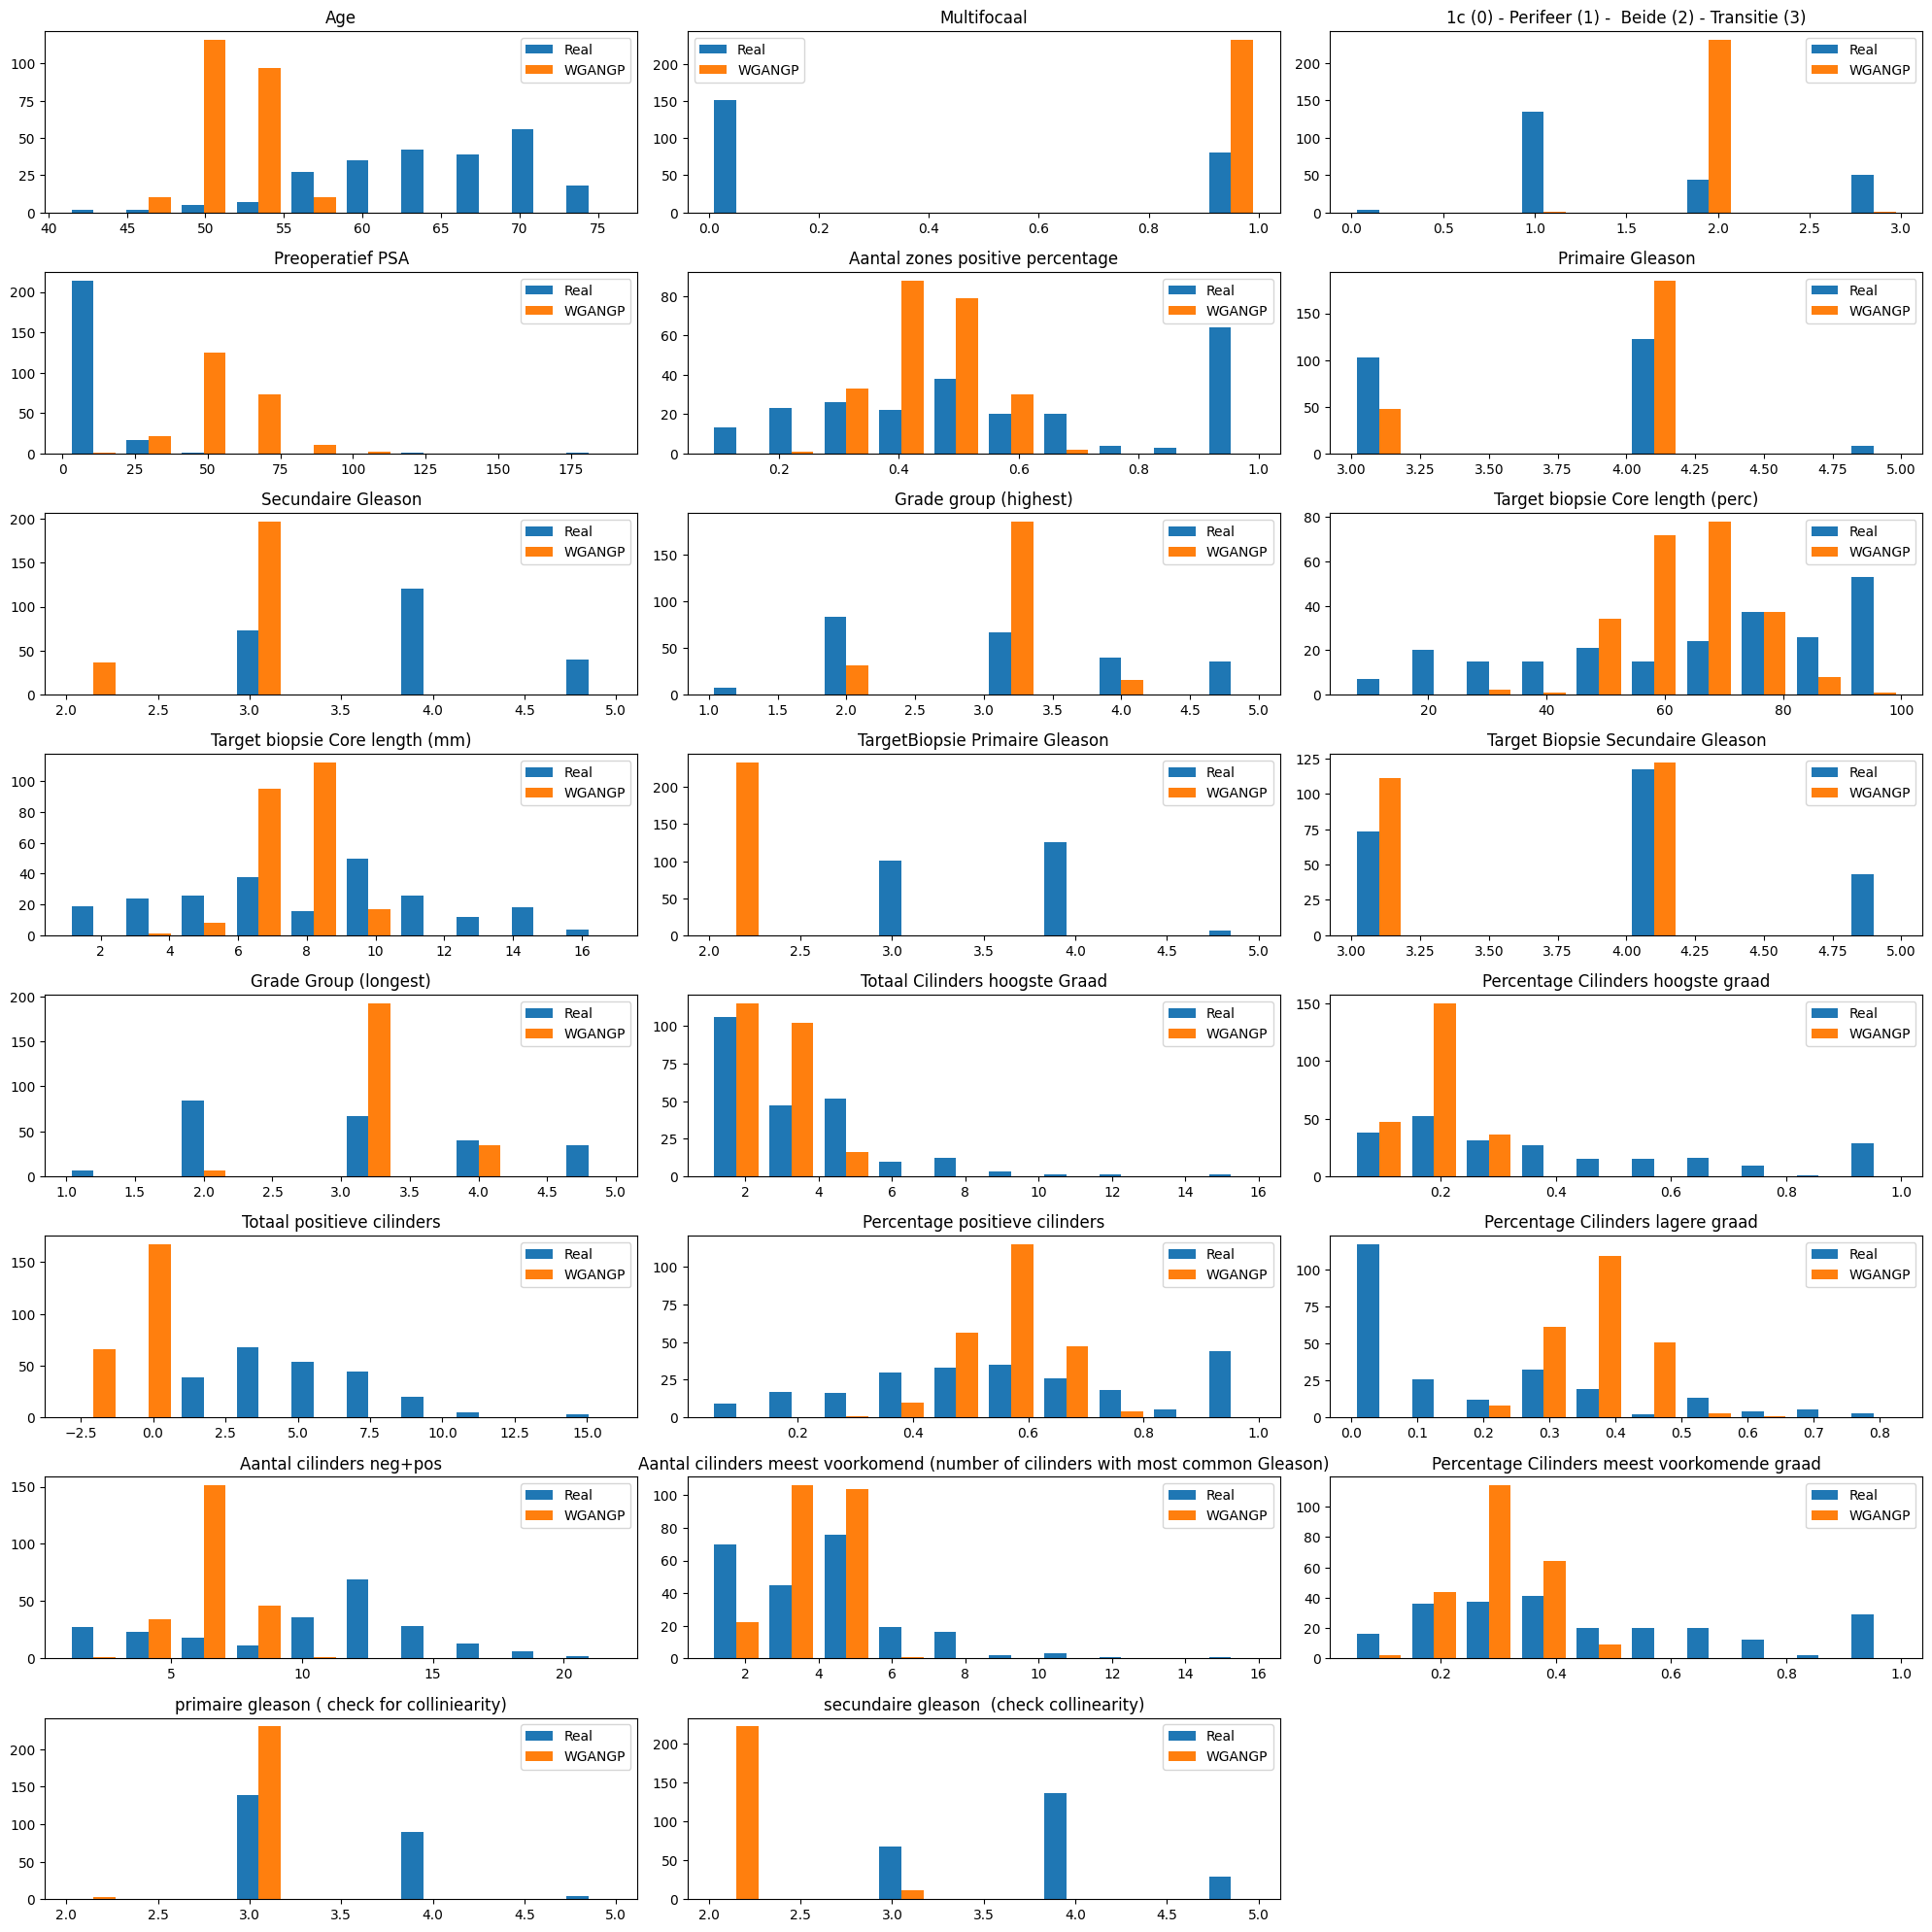

In [13]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=8, ncols=3, figsize=(20,20))
idx = {0:[0,0],1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2], 12:[4,0],
      13:[4,1], 14:[4,2], 15:[5,0], 16:[5,1],17:[5,2],18:[6,0],19:[6,1],20:[6,2],21:[7,0],22:[7,1],23:[7,2]}
for i in range(1, len(idx)+1):
    data = np.column_stack((real_data[columns[i]], synthetic_data[columns[i]]))
    axs[idx[i-1][0], idx[i-1][1]].hist(data, density=False, histtype='bar', label=['Real','WGANGP'])
    axs[idx[i-1][0], idx[i-1][1]].set_title(columns[i])
    axs[idx[i-1][0], idx[i-1][1]].legend()

fig.delaxes(axs[7,2])
fig.tight_layout(pad=1.1)

In [14]:
#Save generated samples
synthetic_data.to_csv(SYNTHETIC_FILE, index=False)